In [1]:
import numpy as np
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

# read original sound
fs, data = wavfile.read('test/test.wav')

# normalize to [-1,1) range
data = data.astype(np.float32)
data = (data / np.max(np.abs(data)))
data -= np.mean(data)

ipd.Audio(data, rate=fs)

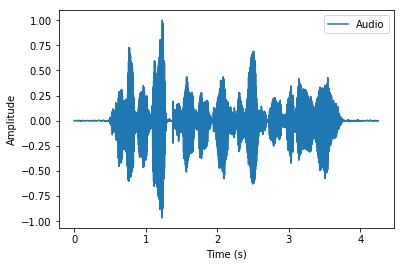

In [2]:
# plot original audio wavform
length = data.shape[0] / fs
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="Audio")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [3]:
# Generate Additive white Gaussian noise
noise = np.random.normal(0, 0.01, data.shape)

# Add noise
noisy_data = data + noise
ipd.Audio(noisy_data, rate=fs)

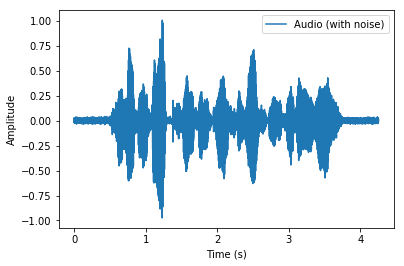

In [4]:
length = noisy_data.shape[0] / fs
time = np.linspace(0., length, noisy_data.shape[0])
plt.plot(time, noisy_data, label="Audio (with noise)")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [5]:
# perform spectrum analysis for sound

# Short-time Fourier transform
s = librosa.stft(noisy_data)
# magnitude and phase of fourier transform
mag_s = np.abs(s)
phase_s = np.angle(s)

# phase information
b = np.exp(1.0j* phase_s) # e^jw

# perform spectrum analysis for noise
ns = librosa.stft(noise)
mag_ns = np.abs(ns)

# get noise spectral mean
mean_ns = np.mean(mag_ns, axis=1)

# subtract noise spectral mean from input spectral
noise_canceled_mag_s = mag_s - mean_ns.reshape((mean_ns.shape[0],1))
# apply phase information
noise_canceled_s = noise_canceled_mag_s * b
# apply inverse fourier transform
noise_canceled = librosa.istft(noise_canceled_s)

ipd.Audio(noise_canceled, rate=fs)

In [6]:
# save result to wav file
wavfile.write("test/noise_canceled.wav", fs, noise_canceled)